In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### No NULL values

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df[df['Insulin']==0].groupby('Outcome')['Insulin'].count()

Outcome
0    236
1    138
Name: Insulin, dtype: int64

In [ ]:
df[df['Glucose']==0].groupby('Outcome')['Glucose'].count()

Outcome
0    3
1    2
Name: Glucose, dtype: int64

In [ ]:
df[df['SkinThickness']==0].groupby('Outcome')['SkinThickness'].count()

Outcome
0    139
1     88
Name: SkinThickness, dtype: int64

In [ ]:
df[df['BloodPressure']==0].groupby('Outcome')['BloodPressure'].count()

Outcome
0    19
1    16
Name: BloodPressure, dtype: int64

In [ ]:
df['Glucose'] = np.where(df['Glucose']==0, df['Glucose'].median(), df['Glucose'])
df['Insulin']=np.where(df['Insulin']==0,df['Insulin'].median(),df['Insulin'])
df['SkinThickness']=np.where(df['SkinThickness']==0,df['SkinThickness'].median(),df['SkinThickness'])
df['BloodPressure']=np.where(df['BloodPressure']==0,df['BloodPressure'].median(),df['BloodPressure'])

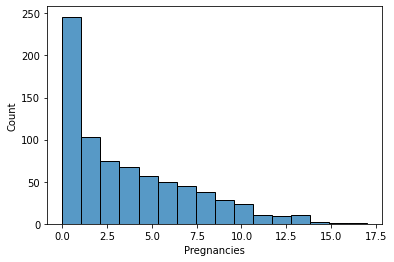

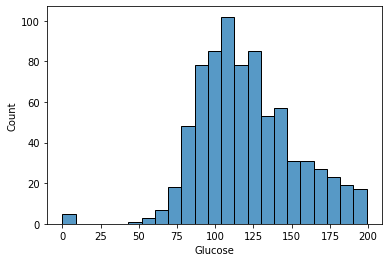

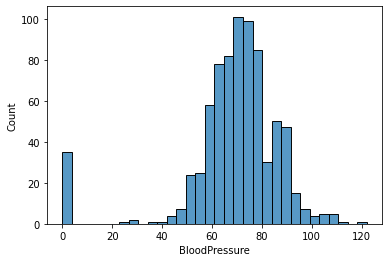

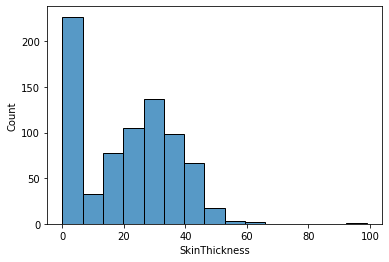

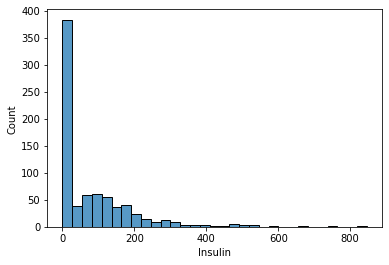

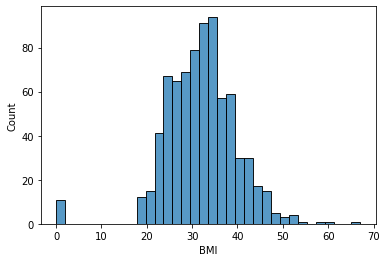

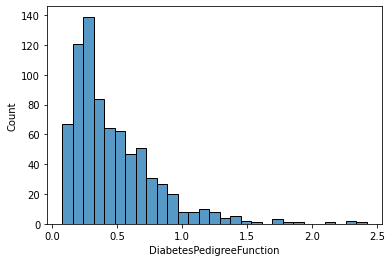

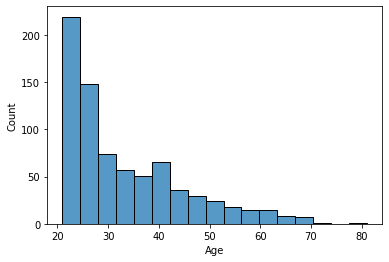

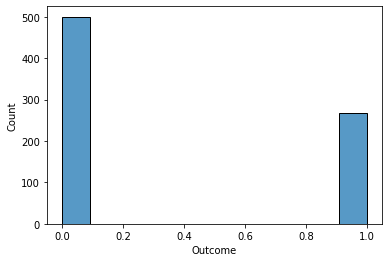

In [ ]:
for feature in df.columns:
  sns.histplot(df[feature])
  plt.show()

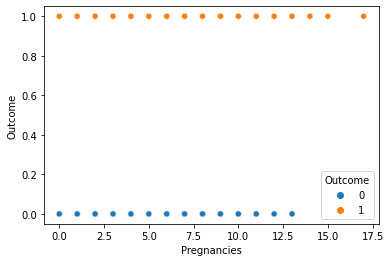

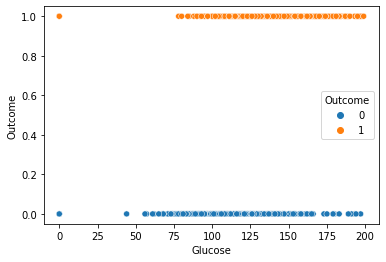

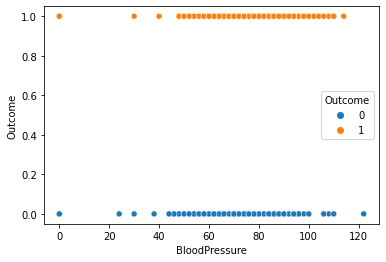

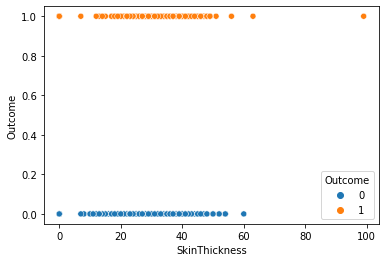

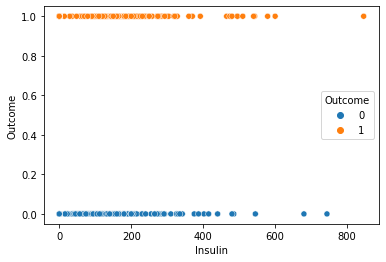

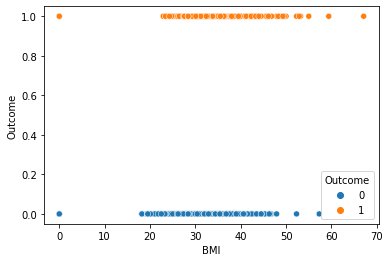

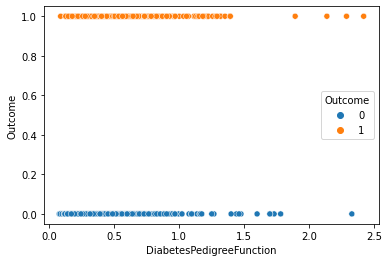

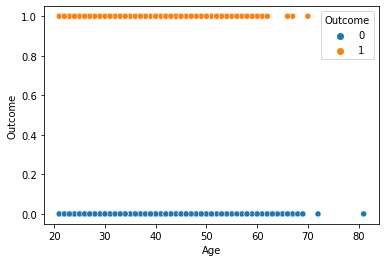

In [ ]:
for feature in df.columns[:-1]:
  sns.scatterplot(df[feature], df['Outcome'], hue=df['Outcome'])
  plt.show()

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)
accuracy

0.8181818181818182

### Hyperparameter Tuning

Using large number of estimators, early_stopping_rounds and a low learning rate increases the accuracy of the model.

Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.

In [ ]:
my_xgb = XGBClassifier(n_estimators=1000, learning_rate=0.01)
my_xgb.fit(X_train, y_train)
y_prediction = my_xgb.predict(X_test)
print(y_prediction)
accuracy1 = accuracy_score(y_prediction, y_test)
print(accuracy1)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]
0.8311688311688312


Accuracy improved by 2%

In [ ]:
my_xgb = XGBClassifier(n_estimators=1000, learning_rate=0.005, early_stopping_rounds=5)
my_xgb.fit(X_train, y_train)
y_prediction = my_xgb.predict(X_test)
print(y_prediction)
accuracy1 = accuracy_score(y_prediction, y_test)
print(accuracy1)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0]
0.8181818181818182
